In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# import csv file

df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
df.shape

(103904, 25)

In [5]:
# Drop unwated columns

df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Exploratory Data Analysis

In [7]:
# New column to categorize different age groups

def age(x):
    if x>=7 and x<=19:
        return 'Children'
    elif x>=17 and x<=39:
        return 'Young Adults'
    elif x>=40 and x<=59:
        return 'Middle-Aged Adult'
    else:
        return 'Old'
df['Age Category']=df['Age'].apply(lambda x:age(x))

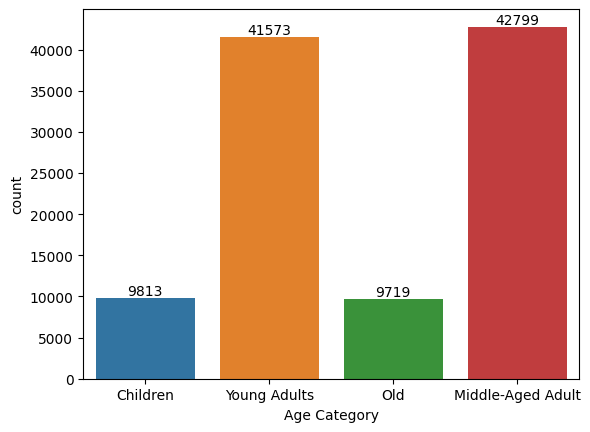

In [8]:
# Count of passengers according their age groups

ct=sb.countplot(x='Age Category',data=df)
for i in ct.containers:
    ct.bar_label(i)

* Majority of the passengers are either Middle-Aged Adults or Young Adults

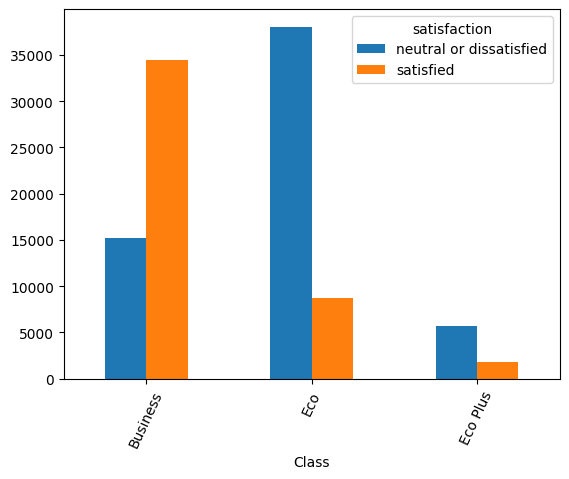

In [9]:
# Satisfaction counts as per class

df.groupby('Class')['satisfaction'].value_counts().unstack().plot(kind='bar')
plt.xticks(rotation=65);

* Those who travel business class are more satisfied with the service than those who travel econmoic or econmic plus

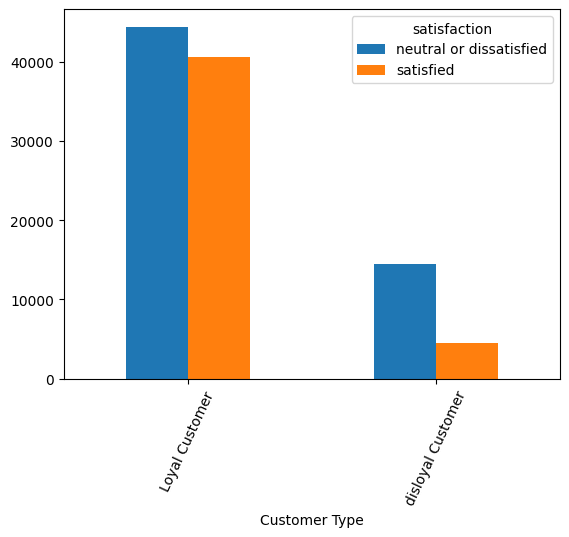

In [10]:
# Loyal customer analysis

df.groupby('Customer Type')['satisfaction'].value_counts().unstack().plot(kind='bar')
plt.xticks(rotation=65);

* The visual state that the majority of the loyal customer were either neutral or dissatisifed with the airline. The same with the disloyal customers where the rate of dissatisfaction is higher.
* Regardless of the customer status, it can be noticed that the the overall satisfaction is higher in business class.

#### Preferences of travel by distance

In [11]:
# Unique travel options

df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [12]:
# The average distance travelled by passengers for various travel options

business=df[df['Class']=='Business']['Flight Distance'].mean() #1575.9

In [13]:
eco_plus=df[df['Class']=='Eco Plus']['Flight Distance'].mean() #747.1

In [14]:
eco=df[df['Class']=='Eco']['Flight Distance'].mean() #743.4

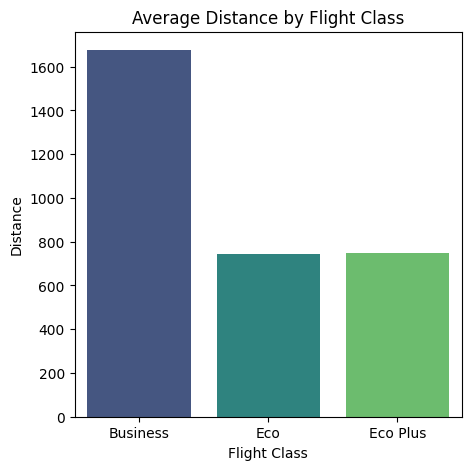

In [15]:
class_names = ['Business', 'Eco', 'Eco Plus']
distance = [1675.9, 743.4, 747.1]

data = {'Flight Class': class_names, 'Distance': distance}
df1 = pd.DataFrame(data)

plt.figure(figsize=(5, 5))
sb.barplot(data=df1, x='Flight Class', y='Distance', palette='viridis')
plt.xlabel('Flight Class')
plt.ylabel('Distance')
plt.title('Average Distance by Flight Class')
plt.show()

* The chart specifies that those who choose business class often travel farther than those who choose other options.

In [16]:
# To find what the majority of the passengers across all classes rate the wifi-service

In [17]:
pd.crosstab(df['Class'],df['Inflight wifi service'])

Inflight wifi service,0,1,2,3,4,5
Class,,,,,,
Business,1979,9042,11088,10863,9436,7257
Eco,929,7665,12801,13064,8843,3443
Eco Plus,195,1133,1941,1941,1515,769


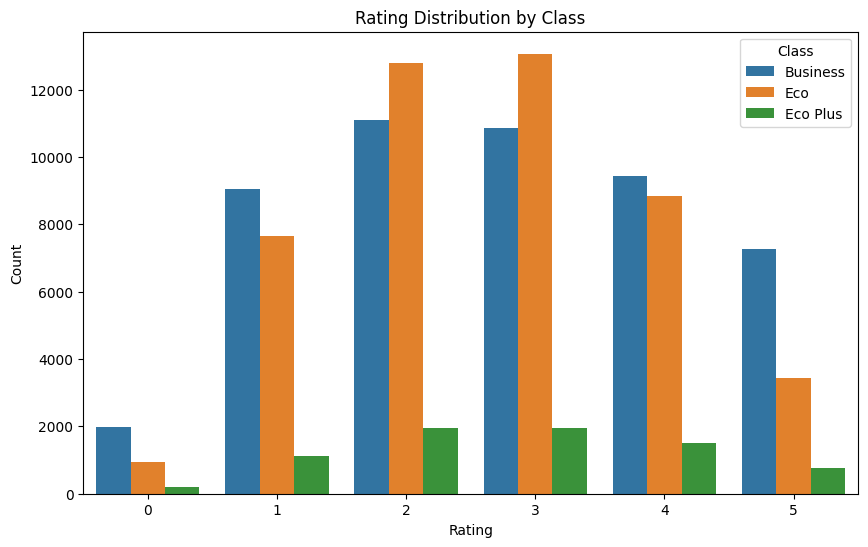

In [18]:
# Define the data
data = {
    'Rating': [0, 1, 2, 3, 4, 5],
    'Business': [1979, 9042, 11088, 10863, 9436, 7257],
    'Eco': [929, 7665, 12801, 13064, 8843, 3443],
    'Eco Plus': [195, 1133, 1941, 1941, 1515, 769]
}

# Create a DataFrame from the data
df2 = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for Seaborn
df_melted = df2.melt(id_vars='Rating', var_name='Class', value_name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sb.barplot(x='Rating', y='Count', hue='Class', data=df_melted)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution by Class')
plt.show()

* Most travelers in Business class gave the internet service a rating of 2, while those in Eco and Eco Plus gave it a rating of 3.

In [19]:
# Analyse if different classes have difference in departure and arrival time 

In [88]:
df['Departure Delay in Minutes'].mean() #14.8
df[df['Class']=='Business']['Departure Delay in Minutes'].mean() #14.3
df[df['Class']=='Eco']['Departure Delay in Minutes'].mean() #15.1
df[df['Class']=='Eco Plus']['Departure Delay in Minutes'].mean() #15.4

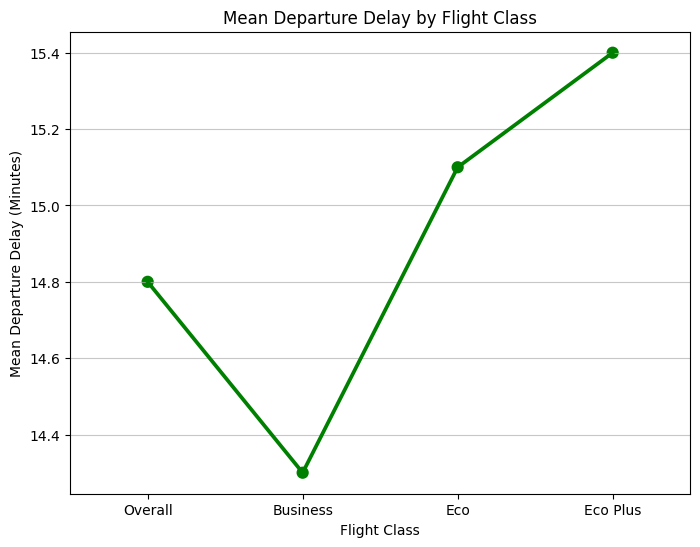

In [21]:
# Plot the data

class_names = ['Overall','Business', 'Eco', 'Eco Plus']
mean_delays = [14.8,14.3, 15.1, 15.4]  # Mean departure delays for each class

plt.figure(figsize=(8, 6))
sb.pointplot(x=class_names, y=mean_delays, color='green', markers='o')
plt.xlabel('Flight Class')
plt.ylabel('Mean Departure Delay (Minutes)')
plt.title('Mean Departure Delay by Flight Class')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [89]:
df['Arrival Delay in Minutes'].mean() #15.1
df[df['Class']=='Business']['Arrival Delay in Minutes'].mean() #14.5
df[df['Class']=='Eco']['Arrival Delay in Minutes'].mean() #15.6
df[df['Class']=='Eco Plus']['Arrival Delay in Minutes'].mean() #16

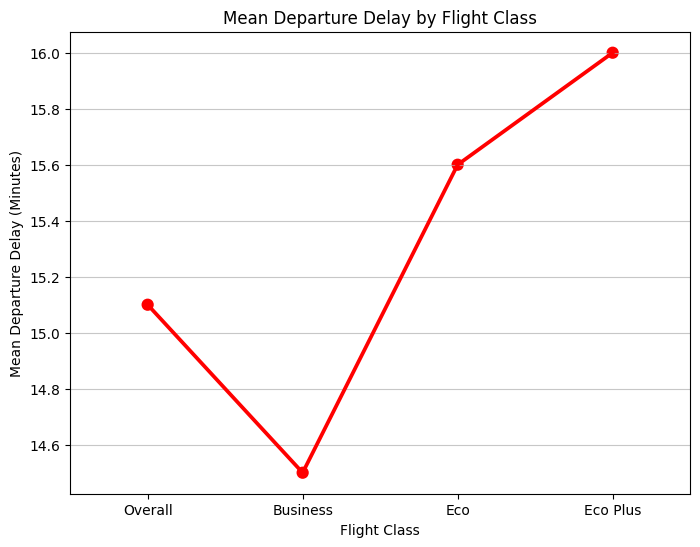

In [23]:
# Plot the data

class_names = ['Overall','Business', 'Eco', 'Eco Plus']
mean_delays = [15.1,14.5,15.6,16]  # Mean departure delays for each class

plt.figure(figsize=(8, 6))
sb.pointplot(x=class_names, y=mean_delays, color='red', markers='o')
plt.xlabel('Flight Class')
plt.ylabel('Mean Departure Delay (Minutes)')
plt.title('Mean Departure Delay by Flight Class')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

* In both scenarios, the average delay in departure and arrival for the Business class is lesser than the overall average of delay for departure and arrival.

In [ ]:
# Instead of using several variables with ratings on multiple factors, a single variable that averages all parameters can be used. 

df['Overall Service']=df['Inflight wifi service']+df['Departure/Arrival time convenient']+df['Ease of Online booking']+df['Gate location']+df['Food and drink']+df['Online boarding']+df['Seat comfort']+df['Inflight entertainment']+df['On-board service']+df['Leg room service']+df['Baggage handling']+df['Checkin service']+df['Inflight service']+df['Cleanliness']
df['Overall Service']=round(df['Overall Service']/14,2)

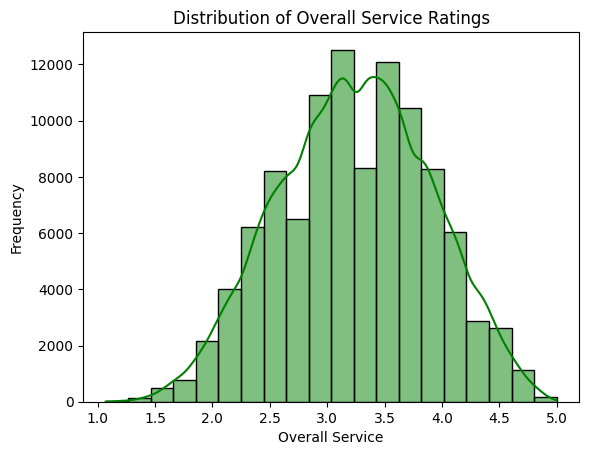

In [87]:
# Histogram for the distribution of the overall ratings
 
sb.histplot(data=df, x='Overall Service', bins=20, kde=True, color='green')
plt.xlabel('Overall Service')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Service Ratings')
plt.show()

* According to the diagram, the majority of customers gave the total service a rating between 3 and 3.8, with 3.2 being the mode.